# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Dataframe

In [11]:
df = pd.read_csv('ecommerce_preparados.csv')
print(df.describe())

        Unnamed: 0         Nota  N_Avaliações    Desconto        Preço  \
count  2199.000000  1559.000000   1559.000000  874.000000  1964.000000   
mean   1102.356526     4.560936    204.062219   15.457666   102.705713   
std     637.791961     0.362854    578.455265   10.929166    69.976425   
min       0.000000     2.300000      1.000000    5.000000    10.880000   
25%     549.500000     4.400000      8.000000    8.000000    50.192500   
50%    1103.000000     4.600000     27.000000   11.000000    78.970000   
75%    1654.500000     4.800000    119.500000   20.000000   139.152500   
max    2206.000000     5.000000   9077.000000   66.000000   597.300000   

       Nota_MinMax  N_Avaliações_MinMax  Desconto_MinMax  Preço_MinMax  \
count  1559.000000          1559.000000       874.000000   1964.000000   
mean      0.837384             0.022374         0.171437      0.156587   
std       0.134390             0.063735         0.179167      0.119328   
min       0.000000             0.0000

## Gráfico de Histograma

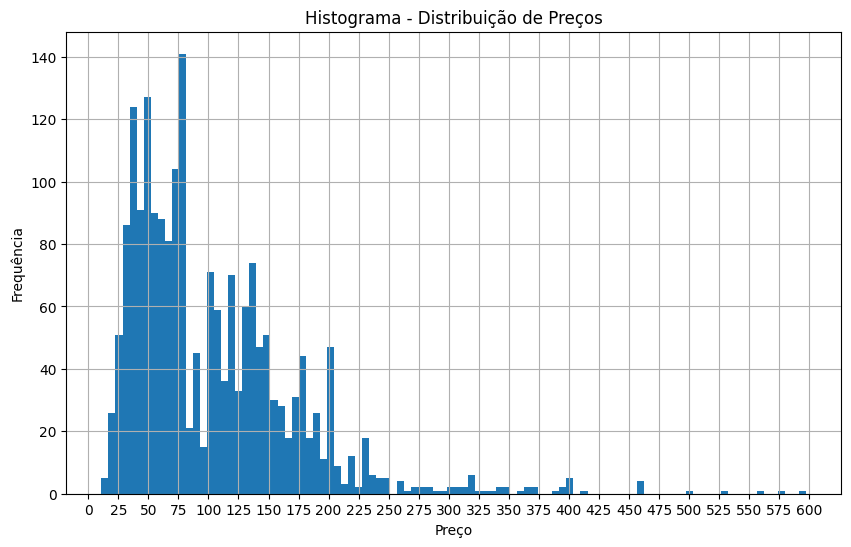

In [9]:
%matplotlib inline

plt.figure(figsize=(10,6))
plt.hist(df['Preço'], bins=100)
plt.title('Histograma - Distribuição de Preços')
plt.xlabel('Preço')
plt.xticks(ticks=range(0, int(df['Preço'].max())+25, 25))
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Com o gráfico de histograma de preço é possível verificar que a maioria dos produtos tem um ticket médio baixo

## Gráfico de dispersão

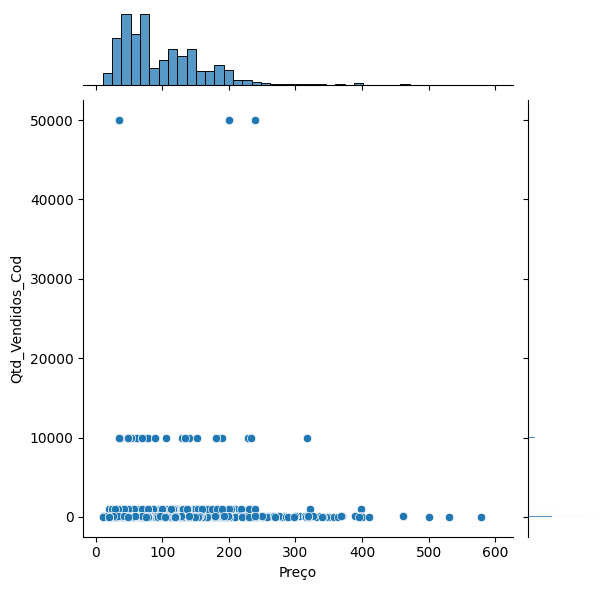

In [47]:
sns.jointplot(x='Preço', y='Qtd_Vendidos_Cod', data=df, kind='scatter')
plt.show()

Plotando o gráfico para verificar se há alguma relação entre preço e quantidade de items vendidos e verificar outliers. Há muitos produtos com pouca ou nenhuma venda, independete do preço.

## Mapa de calor

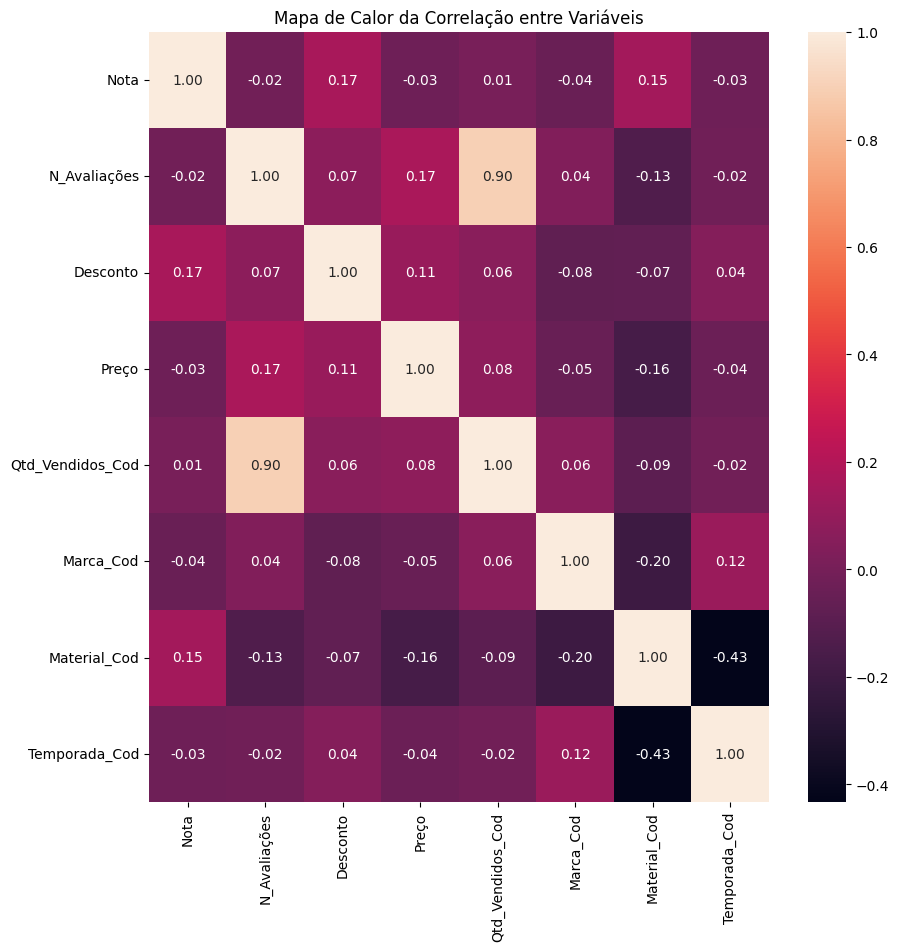

In [45]:
df_corr = df[['Nota', 'N_Avaliações', 'Desconto', 'Preço', 'Qtd_Vendidos_Cod', 'Marca_Cod', 'Material_Cod', 'Temporada_Cod']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, fmt='.2f')
plt.title('Mapa de Calor da Correlação entre Variáveis')
plt.show()

Com o mapa de calor de correlação podemos explorar melhor quais variáveis trabalhar. Boa parte das variáveis tem correlação fraca, com destaque apenas para Qtd_Vendidos x N_Avaliações, o que faz sentido já que para ter avaliações é necessário ter vendas.

## Gráfico de Barra

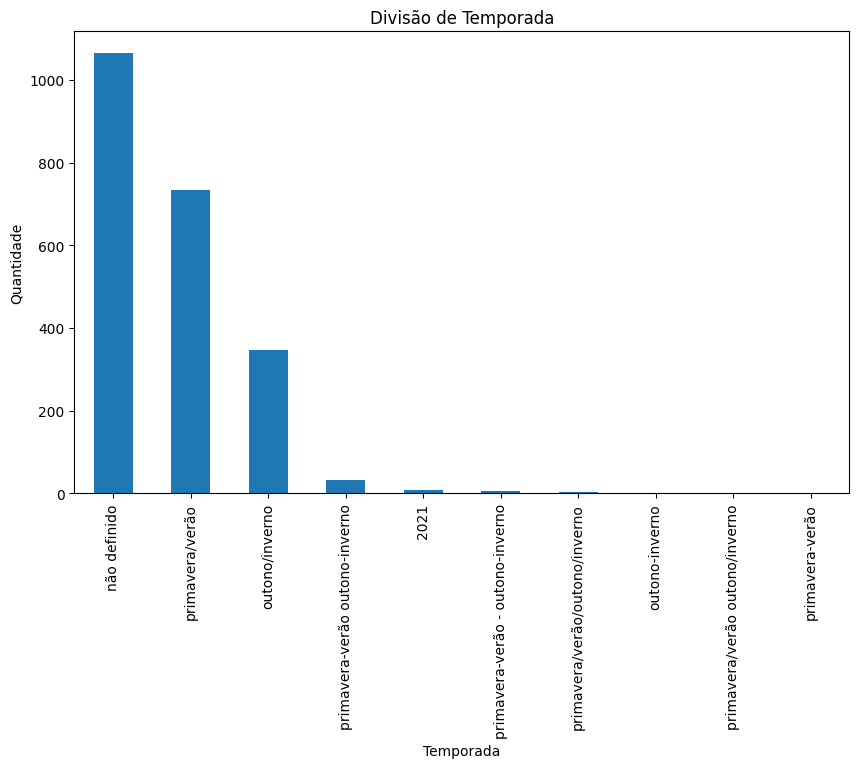

In [55]:
plt.figure(figsize=(10,6))
df['Temporada'].value_counts().plot(kind='bar')
plt.title('Divisão de Temporada')
plt.xlabel('Temporada')
plt.ylabel('Quantidade')
plt.show()

Com esse gráfico de pizza é possível verificar que temos muitos produtos sem temporada definida, o que pode indicar que o catálogo não está muito bem categorizado.

### Gráfico de Pizza

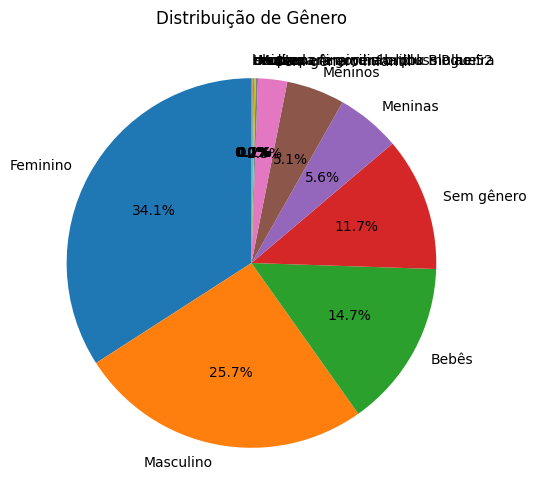

In [57]:
x = df['Gênero'].value_counts().index
y = df['Gênero'].value_counts().values

plt.figure(figsize=(10,6))
plt.pie(y, labels=x, autopct='%.1f%%', startangle=90)
plt.title('Distribuição de Gênero')
plt.show()

Verificamos que boa parte dos produtos são femininos.

### Gráfico de densidade

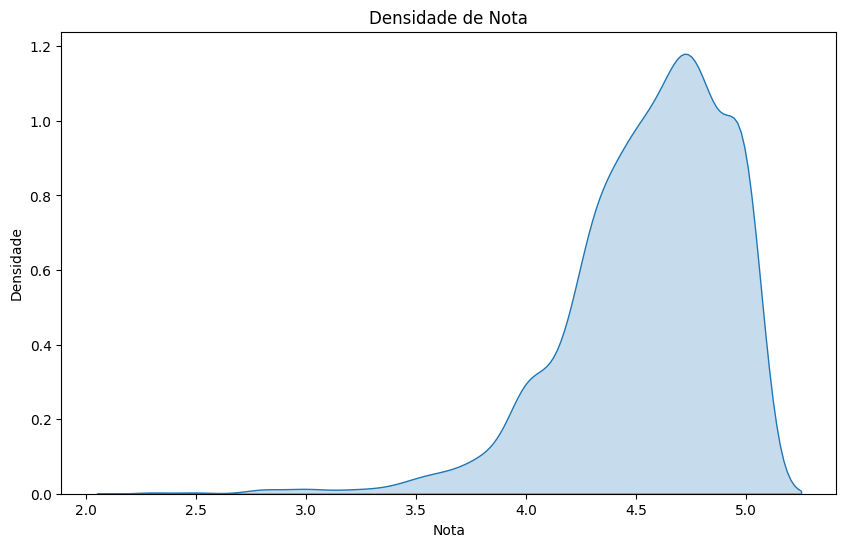

In [59]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['Nota'], fill=True)
plt.title('Densidade de Nota')
plt.xlabel('Nota')
plt.ylabel('Densidade')
plt.show()

Boa parte dos produtos tem boas notas de avaliação.

### Gráfico de Regressão

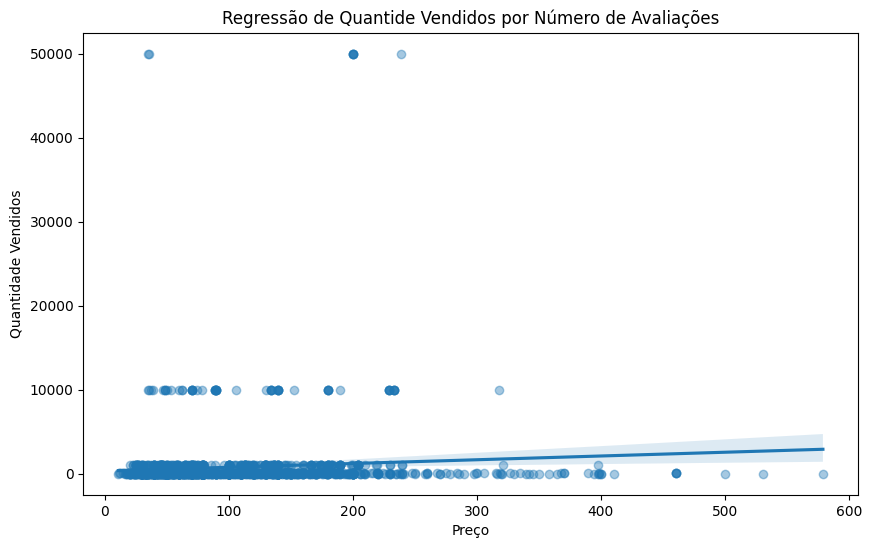

In [64]:
plt.figure(figsize=(10,6))
sns.regplot(x='Preço', y='Qtd_Vendidos_Cod', data=df, scatter_kws={'alpha':0.4})
plt.title('Regressão de Quantide Vendidos por Número de Avaliações')
plt.xlabel('Preço')
plt.ylabel('Quantidade Vendidos')
plt.show()

Com o gráfico de regressão nos ceritificamos de que o preço não tem muita relação com a quantidade de produtos vendidos